# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
import re
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:
def extraerCifras(x):
    cifra = re.findall('[0-9.]+',x)[0]
    if x[-1] == 'K':
        cifra = float(cifra)/1000
    elif x[-1] == 'M':
        cifra =float(cifra)
    else:
        cifra = float(cifra)/1000000
    return cifra

fifa['ValueNumeric'] = list(map(extraerCifras,fifa.Value))

fifa

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.50
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.00
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.50
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.00
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,Right,CM,2.0,...,57.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,0.06
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,Right,ST,2.0,...,39.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,0.06
18204,B. Worman,16,England,47,67,Cambridge United,€60K,Right,ST,3.0,...,69.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,0.06
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,Right,RW,3.0,...,60.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,0.06


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [5]:
# Your code here:
model = ols('ValueNumeric ~ C(fifa["Preferred Foot"]) + C(fifa["Position"]) + C(fifa["Preferred Foot"]):C(fifa["Position"])', data=fifa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
"C(fifa[""Preferred Foot""])",234.162243,1.0,7.734728,5.422475e-03
"C(fifa[""Position""])",16570.015128,26.0,21.051242,2.211476e-97
"C(fifa[""Preferred Foot""]):C(fifa[""Position""])",5152.827941,26.0,6.546369,5.153228e-23
Residual,547750.032080,18093.0,NaN,NaN


What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:
No hay una relación significativa entre la preferencia de los pies del jugador, la posición y el sueldo.

SyntaxError: invalid syntax (<ipython-input-6-4ba5ec283f71>, line 2)

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [7]:
# Your code here:

model2 = ols('ValueNumeric ~ C(fifa["Nationality"])', data=fifa).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
anova_table2

,sum_sq,df,F,PR(>F)
"C(fifa[""Nationality""])",32812.244217,163.0,6.762478,4.840477e-134
Residual,537095.118316,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

In [ ]:
No existe una relación significativa entre la nacionalidad y el sueldo recibido del jugador.

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [8]:
# Your code here:
null_data = fifa[fifa[['SprintSpeed','Stamina','LongShots']].isnull().any(axis=1)].index
fifa = fifa.drop(null_data)
fifa.dtypes

Name               object
Age                 int64
Nationality        object
Overall             int64
Potential           int64
Club               object
Value              object
Preferred Foot     object
Position           object
Weak Foot         float64
Acceleration      float64
SprintSpeed       float64
Stamina           float64
Strength          float64
LongShots         float64
Aggression        float64
Interceptions     float64
Positioning       float64
Vision            float64
Penalties         float64
ValueNumeric      float64
dtype: object

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [10]:
# Your code here:
X = sm.add_constant(fifa['Stamina']) # We must add the intercept using the add_constant function
Y = fifa['SprintSpeed']

mod = sm.OLS(Y,X).fit()
predictions = mod.predict(X) 

print_model = mod.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            SprintSpeed   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.133e+04
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        21:34:28   Log-Likelihood:                -70109.
No. Observations:               18159   AIC:                         1.402e+05
Df Residuals:                   18157   BIC:                         1.402e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.6049      0.350     81.758      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [32]:
# Your conclusions here:

El estadistico F y su probabilidad es muy bajo por lo que hay una gran diferencia entre las medias de los datos. Con la columna P>|t|
se puede inferir que la variable const y Stamina tienen diferencias significativas entre sus medias y la de SprintSpeed.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [12]:
# Your code here:

X = sm.add_constant(fifa['Potential']) # We must add the intercept using the add_constant function
Y = fifa['SprintSpeed']

mod = sm.OLS(Y,X).fit()
predictions = mod.predict(X) 

print_model = mod.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:            SprintSpeed   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1078.
Date:                Thu, 05 Dec 2019   Prob (F-statistic):          8.46e-230
Time:                        21:37:52   Log-Likelihood:                -73989.
No. Observations:               18159   AIC:                         1.480e+05
Df Residuals:                   18157   BIC:                         1.480e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.3998      1.233     19.796      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [34]:
# Your conclusions here:
Este modelo estará más lejos de un mejor ajuste que el anterior ya que está más alejado del 1. El estadistico F indica que la diferencia
entre las medias es significativa.


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

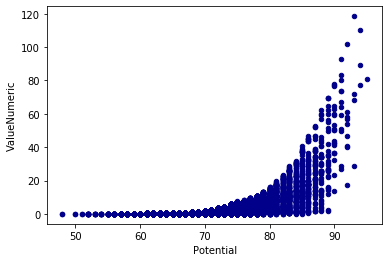

In [13]:
# Your code here:
fifa.plot.scatter(x='Potential',y='ValueNumeric',c='DarkBlue')


In [ ]:
Se ve una relación logaritmica entre el potencial del jugador y el sueldo. 